# Hist 3368 - Week 2 - Wordcloud and Bar Plot

Part of text mining is regularly *inspecting* the data. One of the major tools for inspecting data is to visualize it. 

In this notebook, we'll learn to make two standard visualizations that reduce the major words from a document to a single visualization:
a wordcloud and a bar plot.

## Load some data

The following lines recapitulate the material we went over in an earlier notebook. They download data from online, define a set of stopwords, remove punctuation, lowercase and split the text, and remove standard stopwords.

In [2]:
import urllib.request, urllib.error, urllib.parse, bs4 as bs
source = urllib.request.urlopen('http://www.oldbaileyonline.org/browse.jsp?id=t17800628-33&div=t17800628-33')
soup = bs.BeautifulSoup(source, 'lxml')
text = soup.get_text().lower() 

In [3]:
# we can define a set of words that seem to come from the webpage that we don't want to use
extrawords = ["yes", "mr", "[]", "_gaq.push(['_setaccount'", "browse", "-", "central", "criminal", "court", "var", "_gaq", "=", "_gaq", "||", "[];", 
              "_gaq.push([", "_setaccount", "ua-19174022-1]", "_gaq.push([", "\"_gaq.push(['_setaccount'\"",
              "_trackpageview","(function()", "{", "var", "ga", "=", "document.createelement",
              "'ua-19174022-1'", "_gaq.push(['_trackpageview'",
              "script", "ga.type", "=", "text/javascript", "ga.async", "=", "true;", "ga.src", "=", "https:",
              "==", "document.location.protocol", "?", "https://ssl", ":", "http://www", "+", 
              ".google-analytics.com/ga.js", "var", "s", "=", "document.getelementsbytagname",
              "s.parentnode.insertbefore(ga", "s", "})();", "jump", "to", "contentjump", "to", "main",
              "navigationjump", "section", "navigation",  "proceedings", 
              '(www.oldbaileyonline.org', '8.0', '2020)', '1780',
              "'ua-19174022-1'])", "_gaq.push(['_trackpageview'])", "document.createelement('script')", 
              "'text/javascript'", 'true', "('https:'", "'https://ssl'", '', "'http://www')",
              "'.google-analytics.com/ga.js'", "document.getelementsbytagname('script')[0]", 's)', '})()',
              "bailey",  "1674", "to", "1913", "main", "navigationhomesearchabout",
              "proceedingshistorical", "backgrounddatathe", "projectcontact", "benjamin", "bowsey", 
              "breaking", "peace:", "riot.", "28th", "june", "1780reference", 
              "numbert17800628-33verdictguiltysentencedeathrelated", "material", "associated", 
              "recordsactionscite", "this", "textold", "bailey", "proceedings", "online", 
              '1674-1834', 'api', 'demonstrator', '<!--', 'google_ad_client', 'pub-6166712890256554', 
              '/*', '180x150', 'created', '21/11/08', '*/', 'google_ad_slot', '3829571269', 'google_ad_width',
              '180', 'google_ad_height', '150', '//-->', '<!--', 'google_ad_client', 'pub-6166712890256554', '/*',
              '180x150', 'created', '21/11/08', '*/', 'google_ad_slot', '1983343858', 'google_ad_width', '180', 
              'google_ad_height', '150', '//-->', '<!--', 'google_ad_client', 'pub-6166712890256554', '/*', 
              '180x150', 'created', '21/11/08', '*/', 'google_ad_slot', '9176171409', 'google_ad_width', '180', 
              'google_ad_height', '150', '//-->', 'footer', 'march', '2018', '©', '2003-2018',  
              'www.oldbaileyonline.org', '2020', 't17800628-33).close', "'324'",
              "_gaq.push(['_setaccount", "_gaq.push(['_trackpageview", "document.createelement('script", "document.getelementsbytagname('script')[0",
              "_gaq.push(['_setaccount',", "ua-19174022-1']);", "_gaq.push(['_trackpageview']);", 
              "document.createelement('script');", "text/javascript';", "('https:", "http://www')", 
              ".google-analytics.com/ga.js';", "document.getelementsbytagname('script')[0];", 's.parentnode.insertbefore(ga,', 's);',
               'web', 'site', 'sitemap', 'copyright', '&', 'citation', 'guide', 'visual', 'design', 'technical',
              'design', 'xml', 'feedback', 'ua-19174022-1', "'www.oldbaileyonline.org'", "'2020'", "'t17800628-33).close'", 
              "'ua-19174022-1']", "_gaq.push(['_trackpageview']", 'function', "document.createelement('script'", "'https:'", "'http://www'", '}', 
              "(www.oldbaileyonline.org,", "version", "8.0,", "08", "september", "2020),", "june", "1780,", 
              '"pub-6166712890256554";', '180x150,', '"3829571269";', '180;', '150;', '"pub-6166712890256554";', '180x150,', 
              '"1983343858";', '180;', '150;', '"pub-6166712890256554";', '180x150,', '"9176171409";', '180;', '150;',
              "trial", "of", "benjamin", "bowsey", "(t17800628-33).close", "|", "print-friendly", "version", 
              "|", "report", "errornavigation<", "previous", "text", "(trial", "account)", "|", "next", "recordsactionscite", 
              "text", "(trial", "account)", ">see", "original", "324.", "navigationjump", "contentjump", "browse", "navigationhomesearchabout",
             "proceedingshistorical", "1780reference", "navigationjump", "navigationhomesearchabout", "navigationhomesearchabout", "proceedingshistorical", "backgrounddatathe", "projectcontact",
              "backgrounddatathe", "(trial", "account)", "projectcontact", "(t17800628-33).close", "(www.oldbaileyonline.org,", "numbert17800628-33verdictguiltysentencedeathrelated",
             ]
#print(extrawords)

The following lines recapitulate the code we learned in our last notebook for cleaning text.

Notice how brief the code is after you lump together many commands into a single for loop.

In [4]:
import string
import pandas as pd 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

stopworded = []

for word in text.lower().split(): # loop through every word
    if word not in stopwords: # remove stopwords 
        if word not in extrawords: #remove extrawords
            for c in string.punctuation: # strip punctuation
                word = word.replace(c, "") 
            stopworded.append(word) # save the cood results

count = pd.Series.value_counts(stopworded) # count them

count[:20]

house       23
yes         20
mr          19
prisoner    18
man         16
mob         14
black       13
night       12
no          12
saw         11
him         11
akermans    10
sworn        9
fire         9
know         9
see          9
went         9
face         9
room         8
thing        8
dtype: int64

## Wordclouds

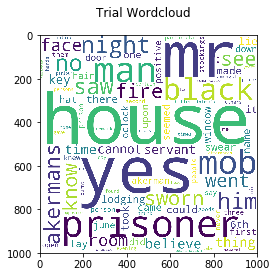

In [12]:
# plot a wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(count)
plt.suptitle('Trial Wordcloud') #This line labels the title
plt.imshow(wc)
plt.show()

Much better!   Now, we're getting a visualization that draws attention to the more and less common words in the text.

One component of a good *inspection* practice is iteration: looking again and again in different ways.  In the present context, iterative inspection means looking at the data using different visualizations.  We've just used a word cloud, but what might we learn from a different way of visualizing the same data, perhaps one that has numbers, not just relative size, as an indicator of how prominent each word is?  

Numbers assigned to words can give us more accuracy, which can allow us to think in terms of comparison.  

Let's try a relatively common graph: a bar plot. 

On the x axis we'll plot all of the counts of words -- how frequently each word appears. This information is in "count"

In [6]:
count[:10]

house       23
yes         20
mr          19
prisoner    18
man         16
mob         14
black       13
night       12
no          12
saw         11
dtype: int64

We also need to tell Python to use the labels that are part of the Series index for count. We access those with .index.

In [7]:
list(count.index)[:10]

['house', 'yes', 'mr', 'prisoner', 'man', 'mob', 'black', 'night', 'no', 'saw']

## Make a Bar Graph

We can use the Python built-in function plt.bar to make a bar graph. 

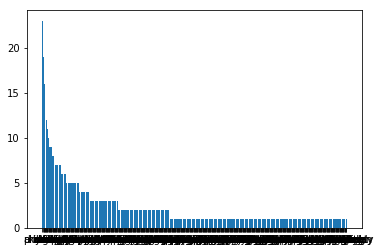

In [8]:
# now prepare the data for a bar graph
plt.bar(list(count.index), count)
plt.show()

It's a histogram, so it's plotting all the word frequencies. The words are on the x axis.  

In general, we might notice that there are many words that appear only one time, and very few words that appear 20 times or more.

But there are so many of them we can't tell which word is which!

Remember: a good graph is a lucid graph.  

Often, we will want to zoom in on just the top words.

We learn from the above visualization that some words occur all the time, but most of the 500 unique words in our text only occur fewer than five times.  

It would be nice to be able to *see* the names of the top words and compare precisely how much their wordcounts vary.

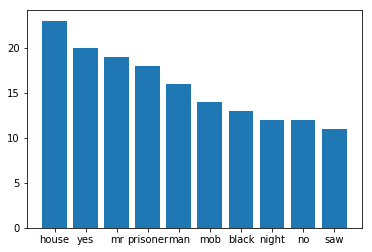

In [9]:
# a more useful barplot would show only the most common words.
mostcommon = count[:10] 

# here's the barplot code
plt.bar(list(mostcommon.index), mostcommon)
plt.show()

That's better, but it's still hard to read.  Let's add some visualization magic.

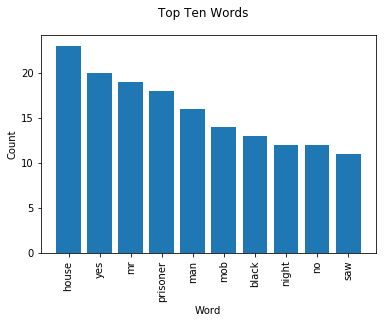

In [10]:
# a well-labeled barplot
plt.bar(list(mostcommon.index), mostcommon)
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Top Ten Words') #This line labels the title
plt.show()

Let's save a copy.  Running the next line should create a file caled 'barplot' in the left-hand sidebar. You can download it and upload it from your machine to Canvas.  You will use this command to download all visualizations for this class.

In [11]:
plt.savefig('barplot.png') # this line tells Python to save a copy in your digital-history folder

<Figure size 432x288 with 0 Axes>

#### Takeaways

Notice how nicely we have labeled the chart.  Do you know exactly what it shows?

In the future, we will expect any visualizations you generate for this class to be well labeled, just like this one.  You may return here for the formatting instructions that will help you to label each axis, to rotate the words, and to supply a title.

### Assignment

Here's what you need to do:

* Change the title of each visualization to read something like "Dr. Guldi's Barplot of the Top Ten Words in a Trial at the Old Bailey," where the name is yours, not Dr. Guldi's, and the title is an accurate description of the context.
* Change *one more thing* about how the visualization works -- the background color, the rotation angle, the height, the color of the bar plot -- anything to make it *yours*
* Use the savefig("filename.png") command to generate a file of the wordcloud and final barplot, both well-labeled.

Upload these files to Canvas.